## 函数的傅里叶变换

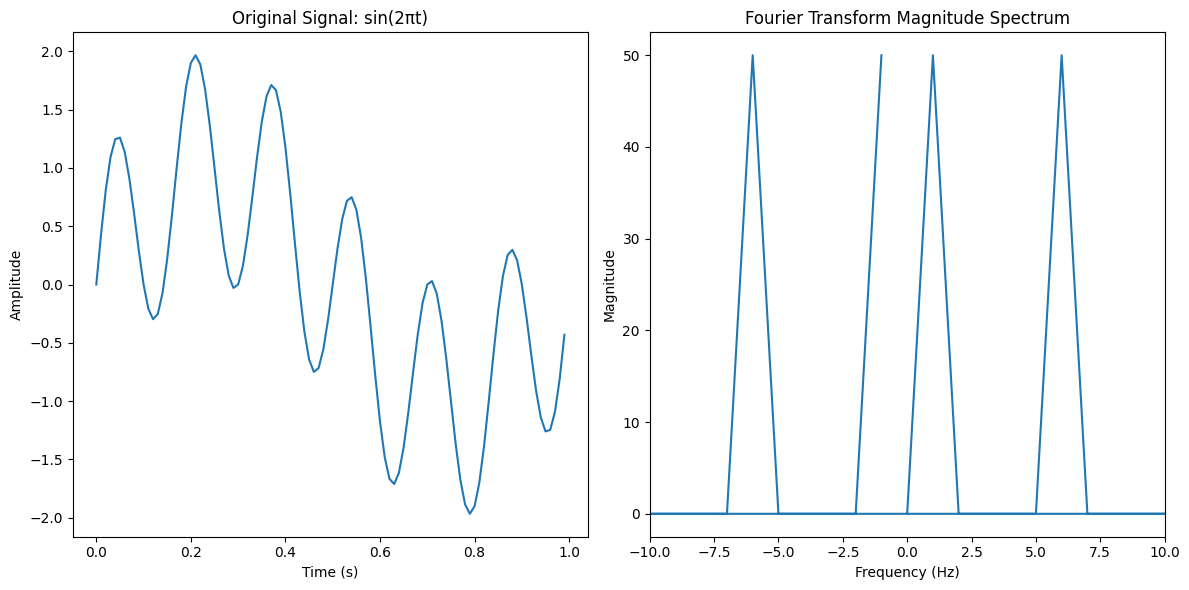

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
sampling_rate = 100  # 采样频率
T = 1.0 / sampling_rate  # 采样周期
t = np.arange(0.0, 1.0, T)  # 时间数组
freq = 1  # 信号频率
f_t = np.sin(2 * np.pi * freq * t)+ np.sin(2 * np.pi * 6 * t) # 正弦信号

# 计算傅里叶变换
F_w = np.fft.fft(f_t)  # 傅里叶变换
N = len(f_t)  # 信号长度
frequencies = np.fft.fftfreq(N, T)  # 计算频率

# 计算幅度谱
magnitude = np.abs(F_w)

# 绘制原始信号和傅里叶变换的结果
plt.figure(figsize=(12, 6))

# 原始信号
plt.subplot(1, 2, 1)
plt.plot(t, f_t)
plt.title('Original Signal: sin(2πt)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 傅里叶变换的幅度谱
plt.subplot(1, 2, 2)
plt.plot(frequencies, magnitude)
plt.title('Fourier Transform Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-10,10)

plt.tight_layout()
plt.show()


The dominant frequency is 50.0 Hz


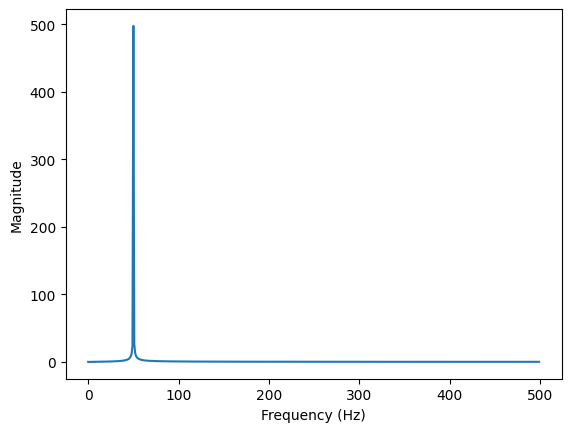

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 假设采样频率是 1000 Hz
sampling_rate = 1000  # 采样频率为 1000 Hz

# 生成信号：50Hz 的正弦波，时间从 0 到 1 秒，1000 个数据点
x = np.linspace(0, 1, sampling_rate)  # 1 秒内有 1000 个采样点
signal = np.sin(2 * np.pi * 50 * x)  # 50 Hz 的正弦波

# 计算 FFT
fft_result = np.fft.fft(signal)

# 计算幅度谱
magnitude = np.abs(fft_result)

# 频率轴
freqs = np.fft.fftfreq(len(signal), 1/sampling_rate)

# 只取正频率部分，注意切片时使用 `//2` 获取前半部分
positive_freqs = freqs[:len(freqs)//2]
positive_magnitude = magnitude[:len(magnitude)//2]

# 查找最大幅度对应的频率
peak_freq_index = np.argmax(positive_magnitude)
peak_freq = positive_freqs[peak_freq_index]

# 输出主频
print(f"The dominant frequency is {peak_freq} Hz")

# 绘制幅度谱
plt.plot(positive_freqs, positive_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


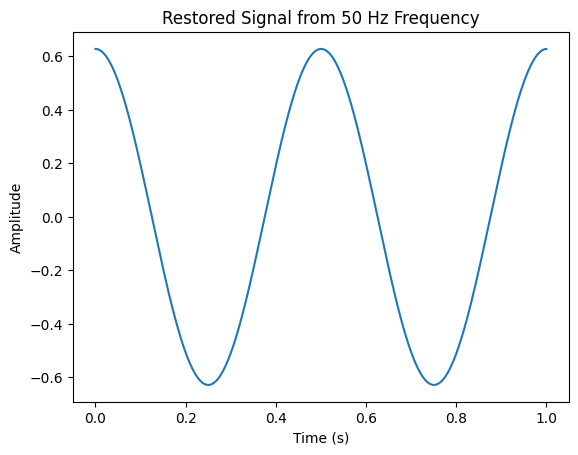

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 设置时间轴，假设采样频率为 1000 Hz
sampling_rate = 1000
t = np.linspace(0, 1, sampling_rate)

# 50 Hz 的正弦波信号
freq = 2  # 频率 50 Hz
amplitude = 314  # 幅度为 1

# 构造频域数据：假设只有 50 Hz 频率
# 在频域中，对于一个单一频率，幅度和相位是确定的
freq_domain = np.zeros(sampling_rate, dtype=complex)
freq_domain[freq] = amplitude  # 假设只有正频率部分
freq_domain[-freq] = amplitude  # 对应的负频率部分

# 使用逆傅里叶变换恢复信号
restored_signal = np.fft.ifft(freq_domain)

# 绘制恢复的信号
plt.plot(t, np.real(restored_signal))  # 取实部，因为逆变换的结果可能包含微小的虚部
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Restored Signal from 50 Hz Frequency')
plt.show()
